## Dataset Information

In this notebook, we work with a subset of the CoraFull dataset, a citation network of scientific publications. 

The full Cora dataset includes 2,708 nodes and 5,429 edges, where each node represents a paper and edges denote citation links between them.

In [1]:
import make_cora_graph_subset

print("Loading subset of Cora dataset")
fn_cora_subset = make_cora_graph_subset.download_sample()
print("Loading full Cora dataset")
fn_cora_full = make_cora_graph_subset.download_full()

Loading subset of Cora dataset
Graph is undirected and unweighted.
Graph is disconnected.
Number of nodes:	    776
Number of edges:	  1,575
Density:		0.005
Sample graph saved to /Users/boris/Documents/teaching/ML on graphs/ML-on-Graphs/data/cora_graph_subset.graphml
Loading full Cora dataset
Graph is undirected and unweighted.
Graph is disconnected.
Number of nodes:	  2,708
Number of edges:	  5,278
Density:		0.001
Full graph saved to /Users/boris/Documents/teaching/ML on graphs/ML-on-Graphs/data/cora_graph_full.graphml


Each node has an attribute `y`, which indicates the subject category of the paper. There are 7 unique classes in total, each corresponding to a specific machine learning-related research topic. These class labels are commonly used for node classification tasks — predicting the research topic of a paper based on its content and citation relationships.

In [2]:
import utils
import networkx as nx
import os
import matplotlib.pyplot as plt
import pandas as pd

dir_data = "data"
G = nx.read_graphml(fn_cora_subset)
utils.print_graph_info(G)

Graph is undirected and unweighted.
Graph is disconnected.
Number of nodes:	    776
Number of edges:	  1,575
Density:		0.005


In [3]:
G = utils.get_giant_component(G)
print("Giant component:")
utils.print_graph_info(G)

Giant component:
Graph is undirected and unweighted.
Graph is connected.
Number of nodes:	    774
Number of edges:	  1,574
Density:		0.005


In [4]:
node = list(G.nodes(data=True))[0]
print(node)

('0', {'y': 1})


In [5]:
node_data = pd.DataFrame([n[1] for n in G.nodes(data=True)])
node_data.head()

,y
0,1
1,0
2,0
3,0
4,0


In [6]:
class_names = {
    0: "0. Case_Based",
    1: "1. Genetic_Algorithms",
    2: "2. Neural_Networks",
    3: "3. Probabilistic_Methods",
    4: "4. Reinforcement_Learning",
    5: "5. Rule_Learning",
    6: "6. Theory",
}

In [7]:
node_data["class_name"] = node_data.y.map(class_names)

<Axes: ylabel='class_name'>

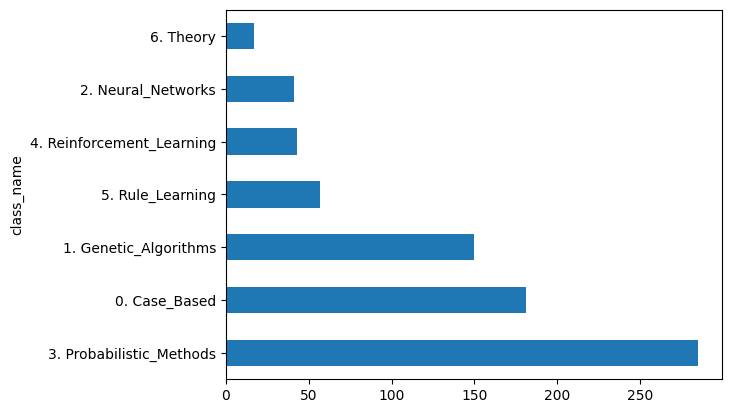

In [8]:
node_data.class_name.value_counts().head(10).plot(kind="barh")

In [9]:
class_counts = node_data.y.value_counts()
class_ranks = class_counts.rank(method="min", ascending=False).astype(int)
class_ranks.head()

y
3    1
0    2
1    3
5    4
4    5
Name: count, dtype: int64

## Unit 7: Introduction to Machine Learning on Graphs

### Section 1: Overview of ML Tasks on Graphs

#### Objectives
*   Understand the fundamental machine learning tasks applied to graph data.
*   Distinguish between node classification, edge prediction, and graph classification.

#### Introduction
Graphs are a powerful way to represent relationships and interactions between entities. Machine learning on graphs allows us to extract insights and make predictions on relational data. This section will introduce the core concepts.

#### Key Concepts

*   **Node Classification:** Predicting the category or label of individual nodes within a graph. For example, in a social network, we might want to classify users as "influential" or "not influential" based on their connections and activity.
*   **Edge Prediction:** Determining whether a connection (edge) exists between two nodes or the strength of such a connection. In a social network, this could be used to predict which people might become friends.
*   **Graph Classification:** Assigning a label or category to an entire graph structure. For instance, classifying different types of social networks or identifying a protein structure from a molecular graph.

#### Code Examples

Let's start by loading the Brightkite dataset and create a network graph using `NetworkX`. We will load the edges from the data set.

The following code snippet demonstrates how to load the dataset using  `NetworkX` library and print basic graph information.

In [10]:
G_full = nx.read_graphml(fn_cora_full)
print("Full Cora dataset:")
utils.print_graph_info(G_full)
G_full = utils.get_giant_component(G_full)
print("Giant component:")
utils.print_graph_info(G_full)

Full Cora dataset:
Graph is undirected and unweighted.
Graph is disconnected.
Number of nodes:	  2,708
Number of edges:	  5,278
Density:		0.001
Giant component:
Graph is undirected and unweighted.
Graph is connected.
Number of nodes:	  2,485
Number of edges:	  5,069
Density:		0.002


Text(0.5, 1.0, 'Visualization of the Cora Giant component')

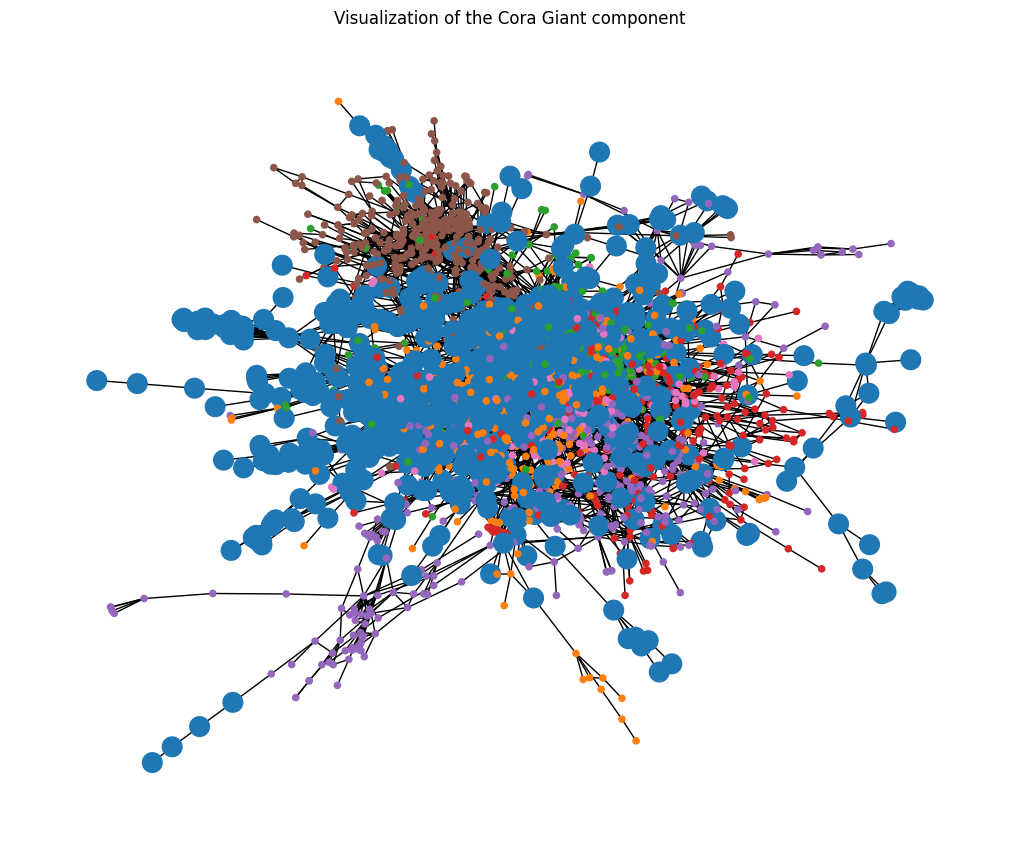

In [11]:
# 10 seconds
def get_node_color(y_val):
    rank = class_ranks.get(y_val, 10000)
    return f"C{rank-1}" if rank <= 10 else "gray"


node_colors = [get_node_color(n[1]["y"]) for n in G_full.nodes(data=True)]
node_sizes = [200 if n[1]["y"] == 3 else 20 for n in G_full.nodes(data=True)]

pos = nx.spring_layout(G_full)

plt.figure(figsize=(10, 8))
nx.draw(
    G_full,
    pos,
    with_labels=False,
    node_size=node_sizes,
    font_size=8,
    node_color=node_colors,
)
plt.title("Visualization of the Cora Giant component")


#### Observations & Explanations

*   **Node classification** can be used to identify influential users or community members in a social network. For instance, we can analyze the network to find the most connected users.
*   **Edge prediction** is useful for recommendation systems and identifying potential links. It helps to suggest new connections that a user might find valuable.
*  **Graph classification** is used for tasks like classifying molecules or social network types, where the overall structure of the graph matters.

#### Quiz

1.  What is the main goal of node classification in graphs?
2.  Provide an example of how edge prediction can be used in a real-world application?
3.  What is graph classification and when is it useful?

### Section 2: Challenges in Applying ML to Graph Data

#### Objectives
*   Identify the unique challenges posed by graph-structured data for machine learning.
*   Discuss the importance of feature engineering for graph data.

#### Introduction
Graph data presents unique challenges not seen in traditional tabular data. Machine learning models need to account for the relational structure inherent in graph data, which often violates assumptions made by conventional algorithms. In this section, we'll explore the major difficulties encountered when applying machine learning to graph data.

#### Key Challenges

*   **Non-Euclidean Nature:** Graph data does not conform to the Euclidean space assumptions that many machine learning models rely upon.  Traditional ML algorithms often assume data points exist in a flat, grid-like space, where distances and similarities are straightforward to calculate. Graphs, on the other hand, have irregular connections and structures which makes distance calculation more challenging.
*   **Feature Engineering:** Constructing meaningful features from the graph structure is crucial. Unlike structured data where features are readily available, feature creation for graphs requires us to extract information from node properties and relationships in the graph.
*   **Variable Size and Structure:** Graphs can have variable numbers of nodes and edges which makes using traditional ML more difficult. Standard ML models assume that inputs have a fixed shape and size. However, the number of nodes and edges may vary.

#### Code Examples

Let's start with calculating a basic graph properties

In [12]:
import numpy as np
import pandas as pd


# Feature vector of a single node based on its neighbors
def create_node_feature_vector(graph, node):
    neighbor_degrees = [graph.degree(neighbor) for neighbor in graph.neighbors(node)]
    ret = {
        "mean_degree": np.mean(neighbor_degrees),
        "std_degree": np.std(neighbor_degrees),
        "min_degree": np.min(neighbor_degrees),
        "max_degree": np.max(neighbor_degrees),
        "median_degree": np.median(neighbor_degrees),
        "num_neighbors": len(neighbor_degrees),
        "clustering_coefficient": nx.clustering(graph, node),
    }
    return ret


def make_features(graph):
    features = []
    node_data = pd.DataFrame([n[1] for n in graph.nodes(data=True)])

    for node in graph.nodes():
        feature_vector = create_node_feature_vector(graph, node)
        features.append(feature_vector)

    df = pd.DataFrame(features, index=graph.nodes())
    df["is_probabilistic"] = (node_data.y == 3).values
    return df


df = make_features(G)
df

,mean_degree,std_degree,min_degree,max_degree,median_degree,num_neighbors,clustering_coefficient,is_probabilistic
0,38.333333,30.136725,5,78,32.0,3,1.000000,False
1,4.000000,1.000000,3,5,4.0,2,0.000000,False
2,10.333333,8.993825,3,23,5.0,3,0.333333,False
3,11.250000,6.941722,5,23,8.5,4,0.500000,False
4,11.000000,6.000000,5,17,11.0,2,0.000000,False
...,...,...,...,...,...,...,...,...
771,24.500000,15.500000,9,40,24.5,2,0.000000,True
772,21.500000,18.500000,3,40,21.5,2,1.000000,True
773,8.500000,13.686216,1,78,5.0,32,0.062500,False
774,25.800000,28.052807,3,78,11.0,5,0.500000,False


In [13]:
df_full = make_features(G_full)
for i in range(1, 3):
    df_full[f"rand_{i}"] = np.random.rand(len(df_full))
df_full

,mean_degree,std_degree,min_degree,max_degree,median_degree,num_neighbors,clustering_coefficient,is_probabilistic,rand_1,rand_2
0,3.333333,0.471405,3,4,3.0,3,0.333333,True,0.366383,0.166226
1,2.666667,1.699673,1,5,2.0,3,0.000000,False,0.599237,0.787122
2,16.000000,24.560130,1,65,5.0,5,0.000000,False,0.286510,0.448209
4,6.600000,1.356466,5,8,7.0,5,0.700000,True,0.391583,0.525473
5,3.000000,0.816497,2,4,3.0,3,0.333333,False,0.278716,0.611209
...,...,...,...,...,...,...,...,...,...,...
2699,2.000000,0.000000,2,2,2.0,1,0.000000,True,0.158816,0.056961
2700,2.000000,0.000000,2,2,2.0,1,0.000000,True,0.052411,0.989877
2702,5.000000,1.000000,4,6,5.0,2,1.000000,False,0.728611,0.548290
2706,3.500000,0.866025,2,4,4.0,4,0.500000,True,0.388019,0.612578


**Why Random Features?**

In the code above, I added two random features to the DataFrame. We will use them to evaluate the performance of the model. Some models assign an importance score to each input feature. If a feature receives an importance score lower than that of the random features, it can be considered uninformative and safely removed.

The code above shows how to create a node feature vector based on the average degree of its neighbor nodes. This is a basic example of feature engineering.

#### Observations & Explanations

*   **Graph neural networks (GNNs)** are designed to overcome the non-Euclidean nature of graphs by using message passing and aggregation techniques that can learn from graph structure.
*   Node features can include node attributes if available, local graph properties (like degree), and neighborhood information (like average neighbor degree) to make node representations more informative.
*   The variable size and structure of graph data may require using special techniques such as padding, sampling, or graph kernels to handle variability in the size and structure of different graphs.

#### Practical Activities

*   Write a function that computes centrality and reputation measures for a node: 
    *   betweenness centrality
    *   closeness centrality
    *   eigenvector centrality
    *   pagerank

Note that for efficiency reasons, you should compute some of these metrics for the entire graph, first, and then use the results to compute the metrics for each node.

*   Visualize the distribution of these metrics to see its characteristics in "probabilistic" and "non-probabilistic" papers. Do you see anything interesting?

In [14]:
def get_more_features(graph) -> pd.DataFrame:
    pagerank_values = nx.pagerank(graph)
    betweenness_centrality = nx.betweenness_centrality(graph)
    closeness_centrality = nx.closeness_centrality(graph)
    eigenvector_centrality = nx.eigenvector_centrality(graph)
    results = pd.DataFrame(index=graph.nodes())
    results["pagerank"] = pagerank_values
    results["betweenness_centrality"] = betweenness_centrality
    results["closeness_centrality"] = closeness_centrality
    results["eigenvector_centrality"] = eigenvector_centrality
    return results

In [15]:
if "pagerank" not in df.columns:
    df = pd.concat([df, get_more_features(G)], axis=1)
df.head()

,mean_degree,std_degree,min_degree,max_degree,median_degree,num_neighbors,clustering_coefficient,is_probabilistic,pagerank,betweenness_centrality,closeness_centrality,eigenvector_centrality
0,38.333333,30.136725,5,78,32.0,3,1.000000,False,0.000804,0.000000,0.236319,0.072760
1,4.000000,1.000000,3,5,4.0,2,0.000000,False,0.000725,0.000283,0.161412,0.000024
2,10.333333,8.993825,3,23,5.0,3,0.333333,False,0.001001,0.000730,0.170452,0.000055
3,11.250000,6.941722,5,23,8.5,4,0.500000,False,0.001152,0.002851,0.200207,0.000522
4,11.000000,6.000000,5,17,11.0,2,0.000000,False,0.000678,0.000041,0.178687,0.000123


In [16]:
# 30 seconds
if "pagerank" not in df_full.columns:
    df_full = pd.concat([df_full, get_more_features(G_full)], axis=1)
df_full.head()

,mean_degree,std_degree,min_degree,max_degree,median_degree,num_neighbors,clustering_coefficient,is_probabilistic,rand_1,rand_2,pagerank,betweenness_centrality,closeness_centrality,eigenvector_centrality
0,3.333333,0.471405,3,4,3.0,3,0.333333,True,0.366383,0.166226,0.000366,0.000001,0.157205,0.000091
1,2.666667,1.699673,1,5,2.0,3,0.000000,False,0.599237,0.787122,0.000420,0.001283,0.165050,0.000095
2,16.000000,24.560130,1,65,5.0,5,0.000000,False,0.286510,0.448209,0.000561,0.004811,0.195252,0.001346
4,6.600000,1.356466,5,8,7.0,5,0.700000,True,0.391583,0.525473,0.000432,0.000655,0.167025,0.004627
5,3.000000,0.816497,2,4,3.0,3,0.333333,False,0.278716,0.611209,0.000367,0.000009,0.141193,0.000690


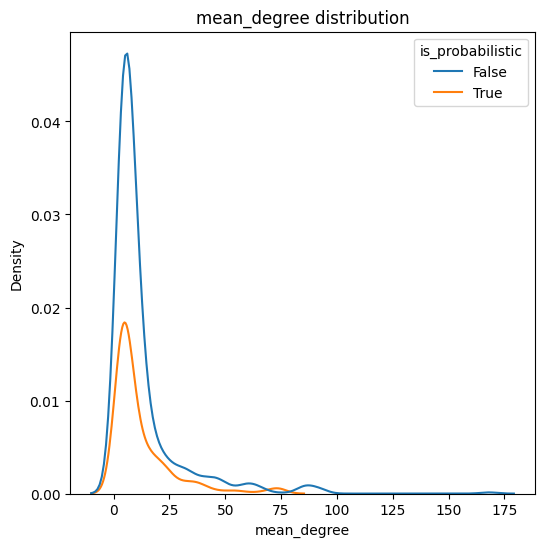

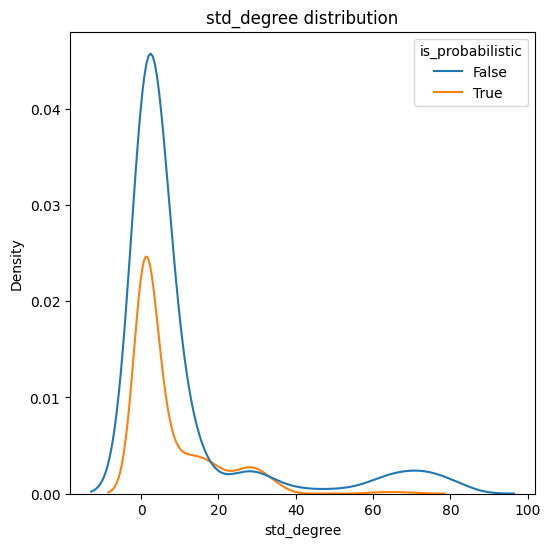

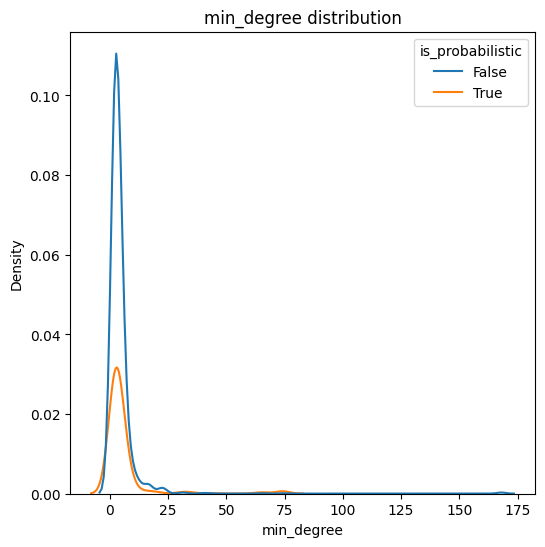

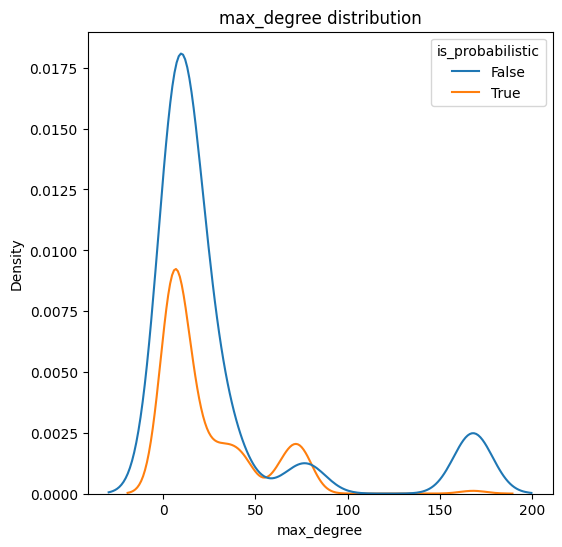

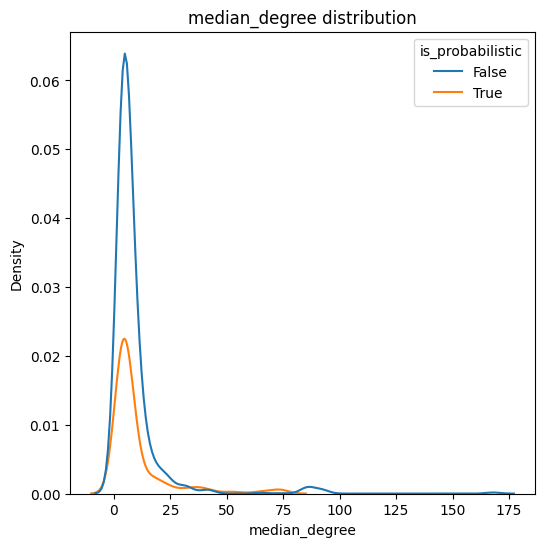

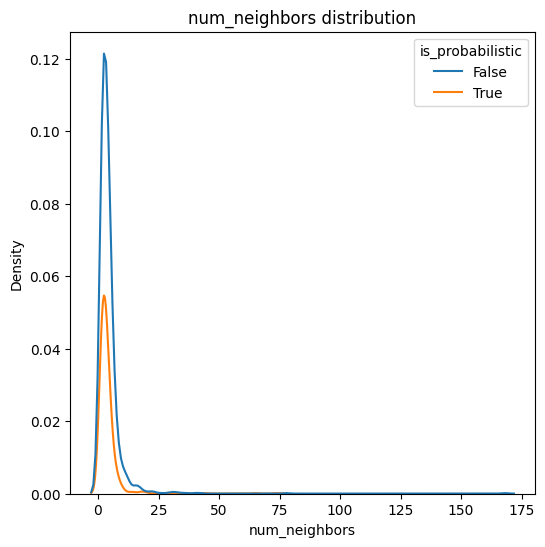

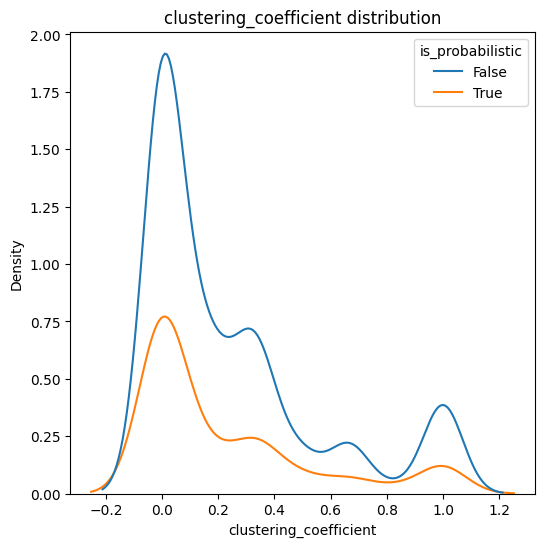

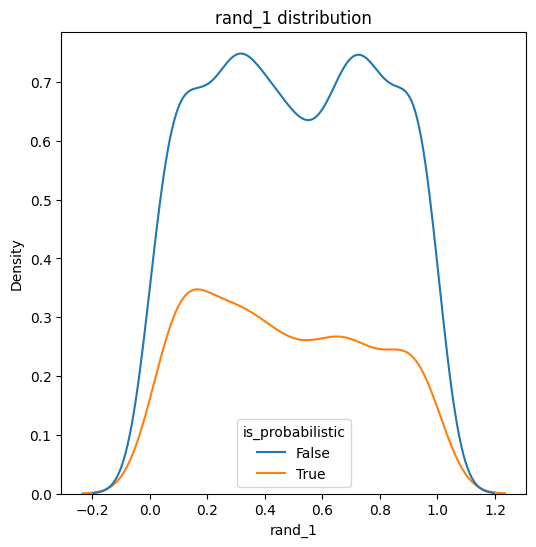

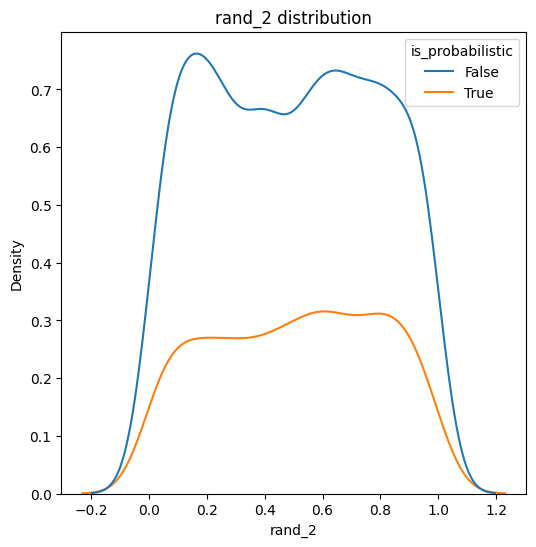

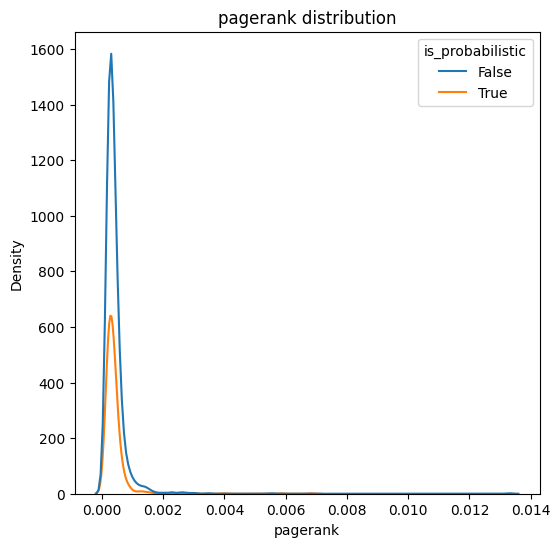

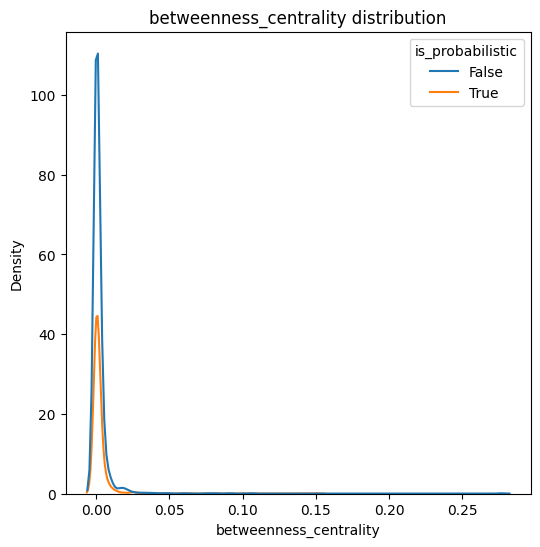

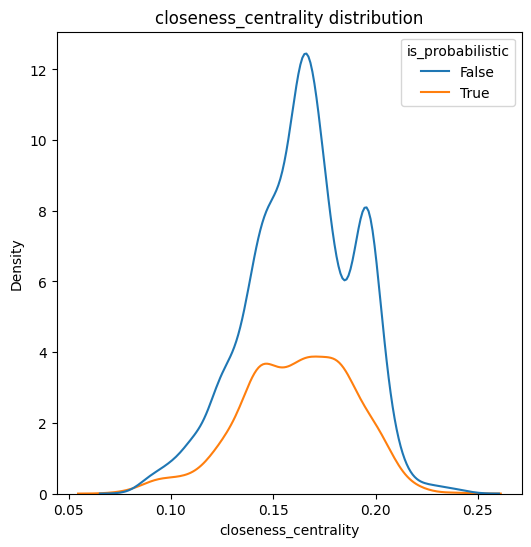

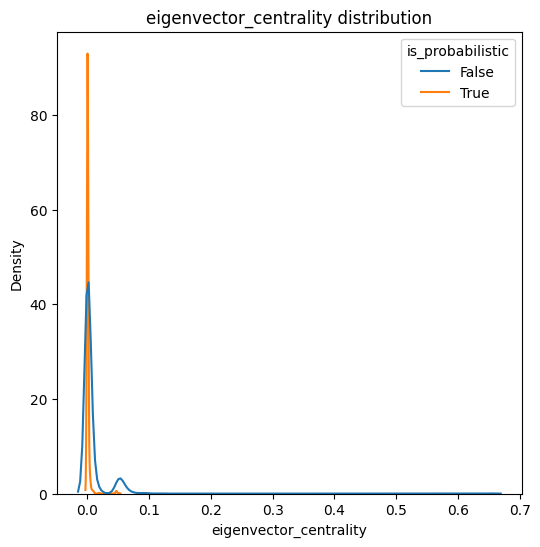

In [17]:
import seaborn as sns

for col in df_full.columns:
    if col == "is_probabilistic":
        continue
    plt.figure(figsize=(6, 6))
    sns.kdeplot(data=df_full, x=col, hue="is_probabilistic")
    plt.title(f"{col} distribution")

#### Quiz

1.  Why is graph data considered non-Euclidean?
2.  What is the importance of feature engineering when working with graph data?
3.  What are the challenges of dealing with variable-sized graphs in machine learning?

## First supervised learning task: node classification

Let's see if we can use a simple logistic regression model to classify the papers as "probabilistic" or "non-probabilistic" based on the features we created in the previous section.

We will use the `sklearn` library to train the model.


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,  # how many we got right
    classification_report,
    roc_auc_score,
    roc_curve,
)

X = df_full.drop(columns=["is_probabilistic"])
y = df_full["is_probabilistic"]
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

print(f"Training set size: {X_train.shape[0]:,d}")
print(f"Test set size: {X_test.shape[0]:,d}")

Training set size: 1,988
Test set size: 497


In [19]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

/Users/boris/miniconda3/envs/sna/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/boris/miniconda3/envs/sna/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/boris/miniconda3/envs/sna/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/boris/miniconda3/envs/sna/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/boris/miniconda3/envs/sna/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X.T @ 

Intercept: [-0.69375627]


<Axes: >

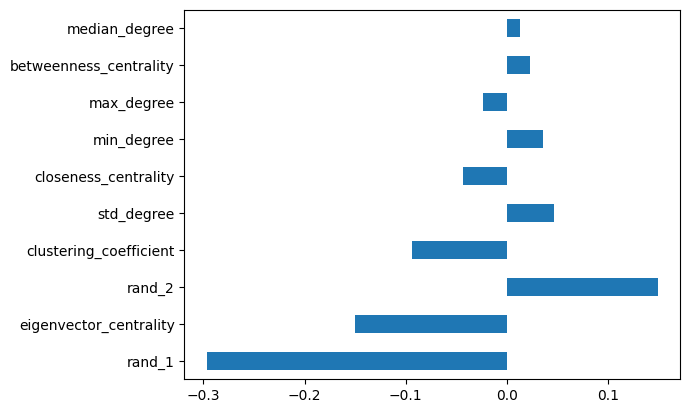

In [20]:
print("Intercept:", classifier.intercept_)
coefficients = pd.Series(classifier.coef_[0], index=X_train.columns)
coefficients.sort_values(ascending=False, inplace=True, key=lambda x: abs(x))
coefficients.head(10).plot(kind="barh")

              precision    recall  f1-score   support

       False       0.72      0.99      0.84       356
        True       0.75      0.04      0.08       141

    accuracy                           0.72       497
   macro avg       0.74      0.52      0.46       497
weighted avg       0.73      0.72      0.62       497



/Users/boris/miniconda3/envs/sna/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/boris/miniconda3/envs/sna/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/boris/miniconda3/envs/sna/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


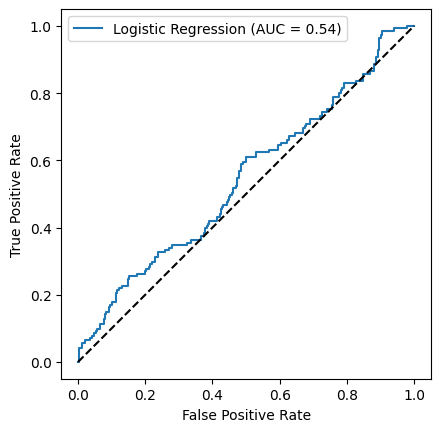

In [21]:
y_pred_scores = classifier.predict_proba(X_test)[:, 1]
roc_curve_data = roc_curve(y_test, y_pred_scores)
roc_curve_auc = roc_auc_score(y_test, y_pred_scores)
print(classification_report(y_test, y_pred))
fig, ax = plt.subplots()
ax.set_aspect(1)
ax.plot(
    roc_curve_data[0],
    roc_curve_data[1],
    label=f"Logistic Regression (AUC = {roc_curve_auc:.2f})",
)
ax.plot([0, 1], [0, 1], "k--")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend()

In [22]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=500)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.81      0.94      0.87       356
        True       0.75      0.45      0.56       141

    accuracy                           0.80       497
   macro avg       0.78      0.69      0.72       497
weighted avg       0.79      0.80      0.78       497



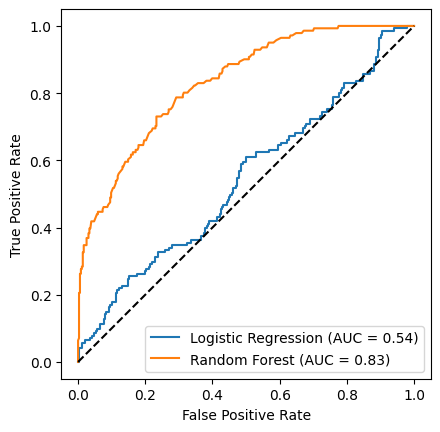

In [24]:
y_pred_scores_forest = classifier.predict_proba(X_test)[:, 1]
roc_score_forest = roc_auc_score(y_test, y_pred_scores_forest)
roc_curve_data_forest = roc_curve(y_test, y_pred_scores_forest)
fig, ax = plt.subplots()
ax.set_aspect(1)
ax.plot(
    roc_curve_data[0],
    roc_curve_data[1],
    label=f"Logistic Regression (AUC = {roc_curve_auc:.2f})",
)
ax.plot(
    roc_curve_data_forest[0],
    roc_curve_data_forest[1],
    label=f"Random Forest (AUC = {roc_score_forest:.2f})",
)
ax.plot([0, 1], [0, 1], "k--")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend()

<Axes: >

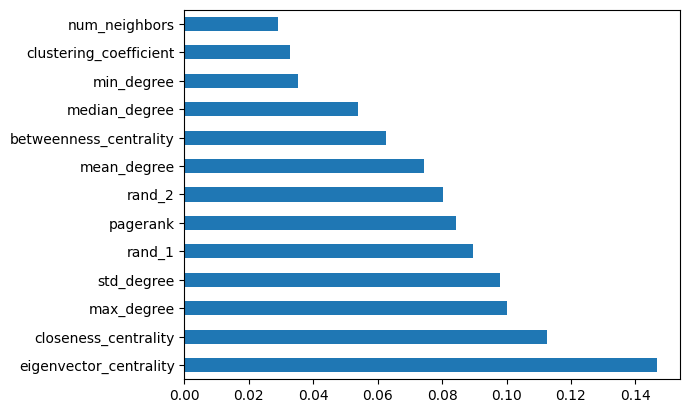

In [25]:
classifier.feature_importances_
classifier.feature_names_in_
importances = pd.Series(
    classifier.feature_importances_, index=classifier.feature_names_in_
)
importances.sort_values(ascending=False, inplace=True)
importances.plot(kind="barh")

### Section 3: Review of Python ML Tools Compatible with Graph Data

#### Objectives

*   Familiarize with Python libraries suited for graph data analysis and machine learning.
*   Learn how to integrate these libraries with the Brightkite dataset.

#### Introduction

There are various Python libraries that provide tools for graph analysis and machine learning. In this section, we will review some of the most commonly used libraries and show how to integrate them with the Brightkite dataset. These libraries offer efficient graph representations, analysis tools, and model building capabilities.

#### Key Libraries

*   **NetworkX:** This is a versatile library for graph creation, manipulation, and analysis. NetworkX is excellent for graph exploration, network visualization, and implementing various graph algorithms.
*   **PyTorch Geometric (PyG):** PyG is a deep learning library built on top of PyTorch that specializes in handling graph-structured data. It provides a streamlined approach for implementing Graph Neural Networks (GNNs).
*   **Scikit-learn:** This is a general-purpose machine learning library that can be used for some basic graph-based machine learning tasks, especially when combined with feature engineering.

The code above converts the graph represented in NetworkX format to the PyTorch Geometric Data object.

#### Observations & Explanations
*   **NetworkX** is ideal for exploration, classical graph algorithms, and network visualization. It’s a great starting point for understanding graph structures.


*   **Scikit-learn** can be used for some basic graph-based tasks, especially when combined with feature engineering, such as node classification using graph features.


*   **PyG** provides a streamlined approach for implementing GNNs on graphs. It handles graph data efficiently and provides the necessary tools to build and train graph-based deep learning models.


In [26]:
from torch_geometric.datasets import Planetoid

# Load CoraFull dataset
cora_full_dataset = Planetoid(root="/tmp/CoraFull", name="Cora")

In [27]:
cora_full_dataset[0]

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [28]:
type(cora_full_dataset)

torch_geometric.datasets.planetoid.Planetoid

In [29]:
type(cora_full_dataset[0])

torch_geometric.data.data.Data

In `dataset[0]`, the index 0 refers to the first (and typically only) graph in the dataset.

PyTorch Geometric datasets are subclasses of torch_geometric.data.InMemoryDataset, which store graphs in memory.

In [30]:
def print_dataset_info(dataset):
    data = dataset[0]
    print(f"{'Number of classes':30}: {dataset.num_classes:,}")
    print(f"{'Number of node features':30}: {dataset.num_node_features:,}")
    print(f"{'Number of nodes':30}: {data.num_nodes:,}")
    print(f"{'Number of edges':30}: {data.num_edges:,}")


print_dataset_info(cora_full_dataset)

Number of classes             : 7
Number of node features       : 1,433
Number of nodes               : 2,708
Number of edges               : 10,556


The dataset contains 1,433 features. Each feature is a boolean value indicating the presence of a specific word in the paper's abstract. The presence of specific words are much better signal for the classification task than the raw network structure.

To create a `networkx` object from a `torch_geometric.data.Data` object, we can use the `to_networkx` function.

We need to convert the graph to an undirected graph because many NetworkX functions, such as `nx.is_connected()`, only operate on undirected graphs. If we attempt to use these functions on a directed graph, NetworkX will raise a `NetworkXNotImplemented` error. 

By setting `to_undirected=True` when calling `to_networkx`, we ensure compatibility with these functions and enable comprehensive graph analysis and visualization.

In [31]:
from torch_geometric.utils import to_networkx

G_converted = to_networkx(cora_full_dataset[0], to_undirected=True)
utils.print_graph_info(G_converted)

Graph is undirected and unweighted.
Graph is disconnected.
Number of nodes:	  2,708
Number of edges:	  5,278
Density:		0.001


In [32]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
import matplotlib.pyplot as plt

# Binary classification: 1 if class == 3 else 0
data = cora_full_dataset[0]
data.y = (data.y == 3).long()

# Train/val/test split
torch.manual_seed(42)
perm = torch.randperm(data.num_nodes)
train_idx = perm[: int(0.6 * len(perm))]
val_idx = perm[int(0.6 * len(perm)) : int(0.8 * len(perm))]
test_idx = perm[int(0.8 * len(perm)) :]


class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, 2)  # Binary output

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x


model = GCN(data.num_node_features, 16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)


def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = F.cross_entropy(out[train_idx], data.y[train_idx])
    loss.backward()
    optimizer.step()


def test():
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index)
        pred = F.softmax(out[test_idx], dim=1)[:, 1]  # Probability of class 1
        y_true = data.y[test_idx].cpu().numpy()
        y_score = pred.cpu().numpy()
        return y_true, y_score


for epoch in range(200):
    train()

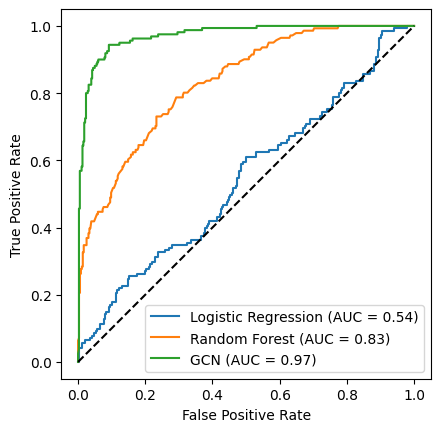

In [33]:
y_test_geom, y_scores_geom = test()

# ROC Curve
roc_curve_data_geom = roc_curve(y_test_geom, y_scores_geom)
roc_curve_auc_geom = roc_auc_score(y_test_geom, y_scores_geom)

fig, ax = plt.subplots()
ax.set_aspect(1)
ax.plot(
    roc_curve_data[0],
    roc_curve_data[1],
    label=f"Logistic Regression (AUC = {roc_curve_auc:.2f})",
)
ax.plot(
    roc_curve_data_forest[0],
    roc_curve_data_forest[1],
    label=f"Random Forest (AUC = {roc_score_forest:.2f})",
)
ax.plot(
    roc_curve_data_geom[0],
    roc_curve_data_geom[1],
    label=f"GCN (AUC = {roc_curve_auc_geom:.2f})",
)
ax.plot([0, 1], [0, 1], "k--")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend()

## Homework

1. **Feature Engineering**  
   Enrich the `df_full` DataFrame with at least **5 new features** that you think are important for the classification task. These can include graph-based or statistical features.
   And remove features that are not informative.


2. **Node Attributes Integration**  
   Extract the **1,433 bag-of-words features** from `cora_full_dataset` and add them to `df_full` as new columns. Ensure alignment by node indices.

3. **Binary Classification: Probabilistic vs. Non-Probabilistic**  
   Classify papers into two groups: "probabilistic" and "non-probabilistic". Define your binary target accordingly (e.g., class 3 vs. others).

   3.1. Build a **Random Forest model using all features** (both graph-based and node-based).  
   3.2. Build a **Random Forest model using only node-related features**.  
   3.3. Build a **Random Forest model using only graph-related features**.  
   3.4. **Compare the ROC-AUC scores** of the three models to evaluate the contribution of different feature types.

4. **Multiclass Classification & Metrics Analysis**  
   Learn and explain the meaning of the following evaluation metrics:  
   - **Accuracy**  
   - **F1-score**  
   - **Matthews Correlation Coefficient (MCC)**  
   - **Cohen's Kappa**

   Then, train a **Random Forest model** to classify papers into each of the **7 classes** (multiclass classification). Compute the **accuracy**, **F1-score**, and **Cohen's Kappa** for your model.  
   **Discuss the results** in terms of model performance and metric interpretation.